In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import os

In [4]:
os.getcwd()

'C:\\Users\\ITESS'

In [5]:
os.chdir(r'F:\Data science\Projects\Brazil Forest Fire')

In [6]:
os.getcwd()

'F:\\Data science\\Projects\\Brazil Forest Fire'

In [10]:
df =pd.read_csv("amazon.csv" , encoding='latin1')

In [11]:
df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [27]:
df.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


# Check data types

In [28]:
df.dtypes

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

# Convert data type of date into datetime64[ns]

In [29]:
df['date'] = df['date'].astype('datetime64[ns]')

# Find shape of our data set , that is no of rows and columns

In [35]:
print("Nof of rows", df.shape[0])
print("Nof of Columns", df.shape[1])

Nof of rows 6454
Nof of Columns 5


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


# Check if there is any null value

In [51]:
df.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

# Check for dupliocate value and drop them 

In [52]:
df.duplicated().any()

False

In [47]:
df.duplicated().sum()

32

In [48]:
df= df.drop_duplicates()

In [50]:
df.duplicated().any()

False

# get overall stas of dataframe

In [55]:
df.describe()

,year,number
count,6422.000000,6422.000000
mean,2007.490969,108.815178
std,5.731806,191.142482
min,1998.000000,0.000000
25%,2003.000000,3.000000
50%,2007.000000,24.497000
75%,2012.000000,114.000000
max,2017.000000,998.000000


# rename months into english from portuguese

In [57]:
df['month']

0        Janeiro
1        Janeiro
2        Janeiro
3        Janeiro
4        Janeiro
          ...   
6449    Dezembro
6450    Dezembro
6451    Dezembro
6452    Dezembro
6453    Dezembro
Name: month, Length: 6422, dtype: object

In [58]:
df['month'].unique()

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [64]:
df['Month_new']=df['month'].map({'Janeiro':'January',
                'Fevereiro':'Febuary',
                'Março':'March',
                'Abril':'April',
                'Maio':'May',
                 'Junho':'June',
                 'Julho':'July',
                'Agosto':'August',
                'Setembro':'September',
                'Outubro':'October',
                'Novembro':'November',
                'Dezembro':'December'})

# total no of fires registered

In [79]:
df.head()

,year,state,month,number,date,Month_new
0,1998,Acre,Janeiro,0.0,1998-01-01,January
1,1999,Acre,Janeiro,0.0,1999-01-01,January
2,2000,Acre,Janeiro,0.0,2000-01-01,January
3,2001,Acre,Janeiro,0.0,2001-01-01,January
4,2002,Acre,Janeiro,0.0,2002-01-01,January


In [69]:
print('Total no of fires registered =',df.shape[0])

Total no of fires registered = 6422


# Which month maximum no of forest fire were registered

In [90]:
name = df.groupby('Month_new')['number'].sum().sort_values(ascending= False).reset_index()

In [91]:
name

,Month_new,number
0,July,92319.113
1,October,88681.579
2,August,88050.435
3,November,85508.054
4,September,58578.305
5,December,57535.480
6,June,55997.675
7,January,47681.844
8,May,34725.363
9,Febuary,30839.050


<Axes: xlabel='Month_new'>

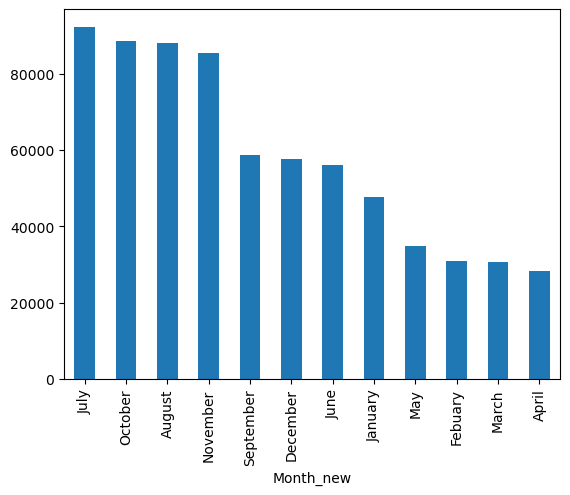

In [89]:
name.plot(kind='bar')

[Text(0, 0, '92319.1'),
 Text(0, 0, '88681.6'),
 Text(0, 0, '88050.4'),
 Text(0, 0, '85508.1'),
 Text(0, 0, '58578.3'),
 Text(0, 0, '57535.5'),
 Text(0, 0, '55997.7'),
 Text(0, 0, '47681.8'),
 Text(0, 0, '34725.4'),
 Text(0, 0, '30839'),
 Text(0, 0, '30709.4'),
 Text(0, 0, '28184.8')]

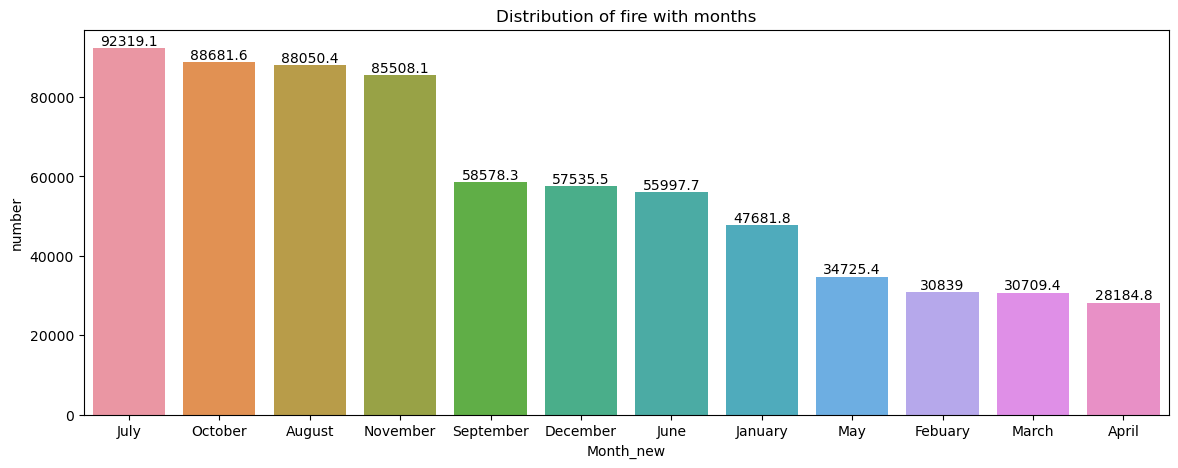

In [97]:
plt.figure(figsize= (14,5))
plt.title("Distribution of fire with months")
sd =sns.barplot(x= 'Month_new', y= 'number', data = name)
sd.bar_label(sd.containers[0])

# In whch year max number of forest fire were reported 

In [98]:
df.head()

,year,state,month,number,date,Month_new
0,1998,Acre,Janeiro,0.0,1998-01-01,January
1,1999,Acre,Janeiro,0.0,1999-01-01,January
2,2000,Acre,Janeiro,0.0,2000-01-01,January
3,2001,Acre,Janeiro,0.0,2001-01-01,January
4,2002,Acre,Janeiro,0.0,2002-01-01,January


In [118]:
name2 = df.groupby('year')['number'].sum().sort_values(ascending= False).reset_index()

In [119]:
name2

,year,number
0,2003,42760.674
1,2016,42212.229
2,2015,41208.292
3,2012,40084.860
4,2014,39621.183
5,2009,39116.178
6,2004,38450.163
7,2002,37390.600
8,2010,37037.449
9,2017,36619.624


[Text(0, 0, '20014'),
 Text(0, 0, '26882.8'),
 Text(0, 0, '27351.3'),
 Text(0, 0, '29054.6'),
 Text(0, 0, '37390.6'),
 Text(0, 0, '42760.7'),
 Text(0, 0, '38450.2'),
 Text(0, 0, '35005'),
 Text(0, 0, '33824.2'),
 Text(0, 0, '33028.4'),
 Text(0, 0, '29379'),
 Text(0, 0, '39116.2'),
 Text(0, 0, '37037.4'),
 Text(0, 0, '34633.5'),
 Text(0, 0, '40084.9'),
 Text(0, 0, '35137.1'),
 Text(0, 0, '39621.2'),
 Text(0, 0, '41208.3'),
 Text(0, 0, '42212.2'),
 Text(0, 0, '36619.6')]

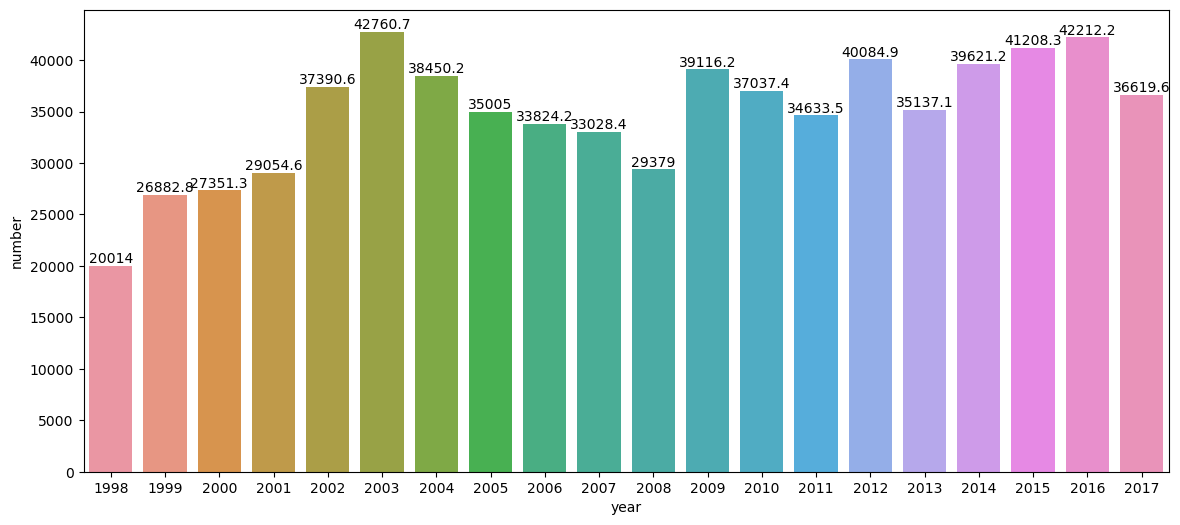

In [123]:
plt.figure(figsize=(14,6))
ds=sns.barplot(x='year',y ='number', data=name2)
ds.bar_label(ds.containers[0])

# in which state maximum forest fire were reported

In [133]:
name3 = df.groupby('state')['number'].sum().sort_values(ascending = False).reset_index()

In [134]:
name3

,state,number
0,Mato Grosso,96246.028
1,Paraiba,52426.918
2,Sao Paulo,51121.198
3,Rio,45094.865
4,Bahia,44746.226
5,Piau,37803.747
6,Goias,37695.520
7,Minas Gerais,37475.258
8,Tocantins,33707.885
9,Amazonas,30650.129


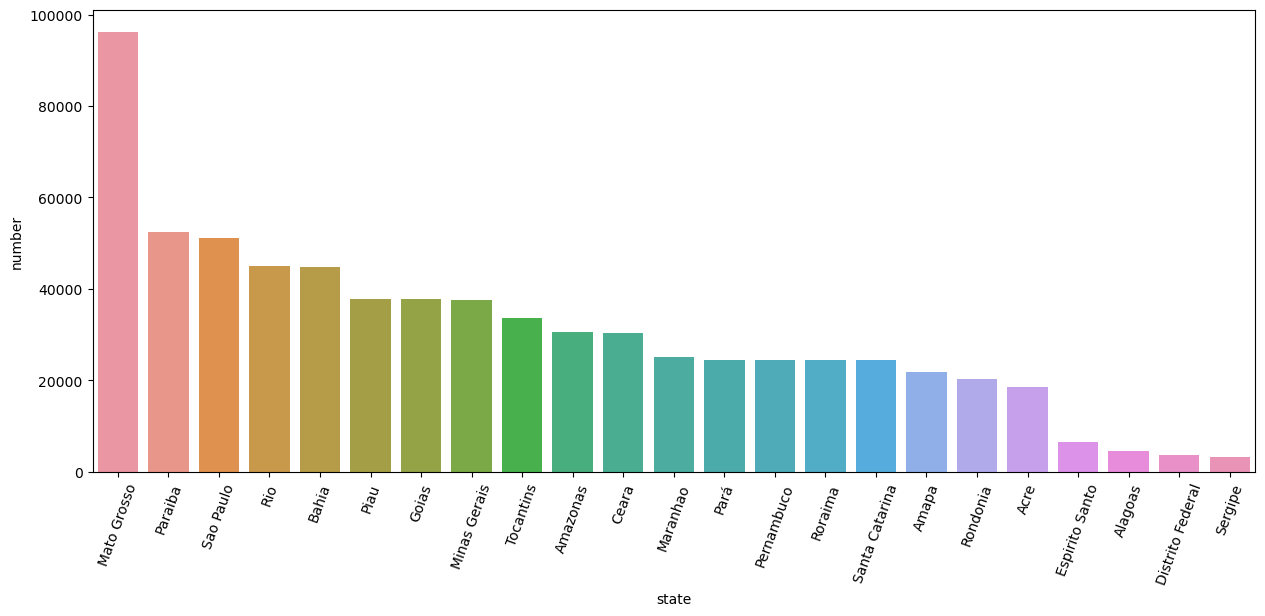

In [147]:
plt.figure(figsize=(15,6))
sns.barplot(x ='state', y='number', data =name3)
plt.xticks(rotation = 70)
plt.show()

# Total number of forest fire reported in amazona state

In [155]:
df[df['state'] == 'Amazonas']['number'].sum()

30650.129

# No of forest fire reported in amazonas year wise

In [188]:
name4 = df[df['state']== 'Amazonas']

In [192]:
name5 =name4.groupby('year')['number'].sum().sort_values(ascending= False).reset_index()

In [196]:
name5

,year,number
0,2002,2852.000
1,2008,2717.000
2,2014,2385.909
3,2010,2324.508
4,2004,2298.207
5,2016,2060.972
6,2005,1657.128
7,2011,1652.538
8,2003,1524.268
9,2009,1320.601


<Axes: xlabel='year', ylabel='number'>

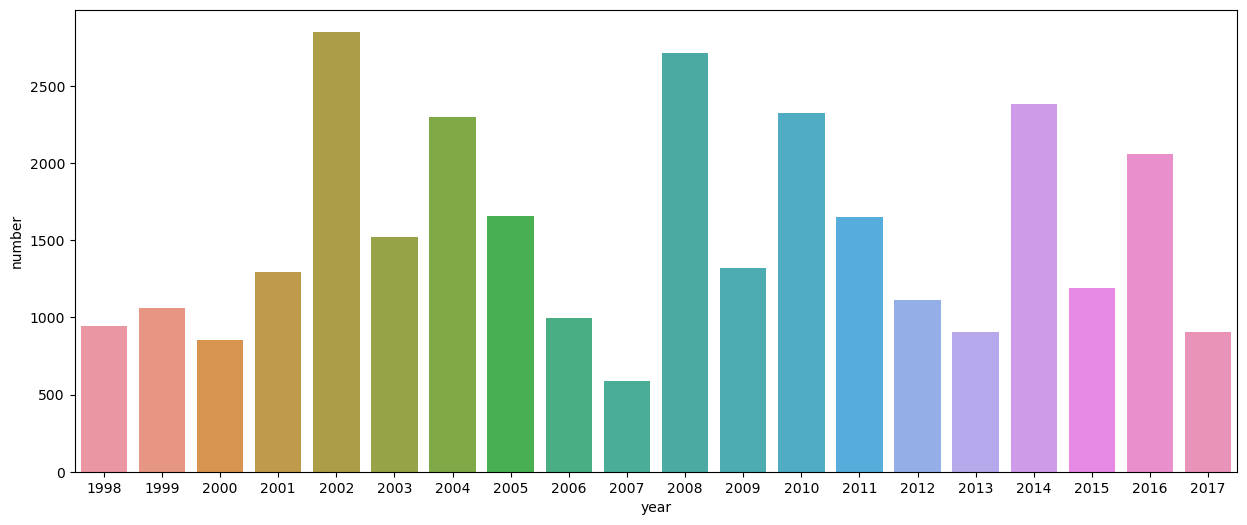

In [194]:
plt.figure(figsize=(15,6))

sns.barplot(x='year',y='number', data=name5)


# Find total number of forest fire reported in 2015 and visulaize data based on each month 

In [209]:
df.columns

Index(['year', 'state', 'month', 'number', 'date', 'Month_new'], dtype='object')

In [214]:
name6 = df[df['year'] == 2015]

In [224]:
name7 = name6.groupby('Month_new')['number'].sum().sort_values(ascending = False).reset_index()

In [225]:
name7

,Month_new,number
0,January,4635.000
1,October,4499.525
2,July,4364.392
3,August,4363.125
4,December,4088.522
5,November,4034.518
6,June,3260.552
7,April,2573.000
8,September,2494.658
9,May,2384.000


<Axes: xlabel='Month_new', ylabel='number'>

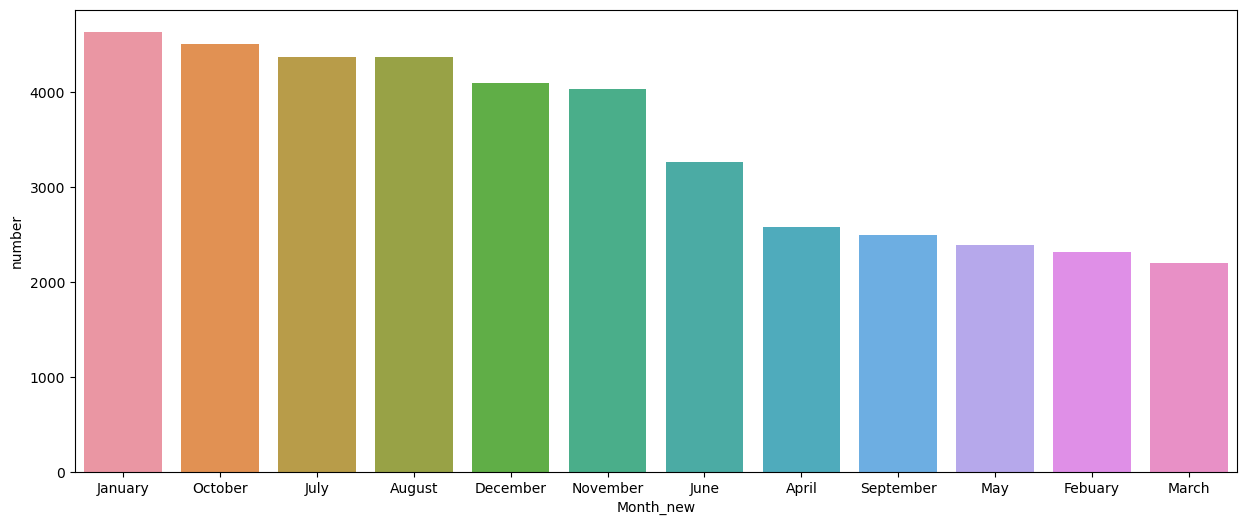

In [227]:
plt.figure(figsize=(15,6))

sns.barplot(x='Month_new', y='number', data = name7)

# Find avg number of fires reported from highest to lowest state wise

In [228]:
df.columns

Index(['year', 'state', 'month', 'number', 'date', 'Month_new'], dtype='object')

In [234]:
fire=df.groupby('state')['number'].mean().sort_values(ascending = False).reset_index()

In [235]:
fire

,state,number
0,Sao Paulo,213.896226
1,Mato Grosso,203.479975
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841
5,Minas Gerais,156.800243
6,Tocantins,141.037176
7,Amazonas,128.243218
8,Ceara,127.314071
9,Paraiba,111.073979


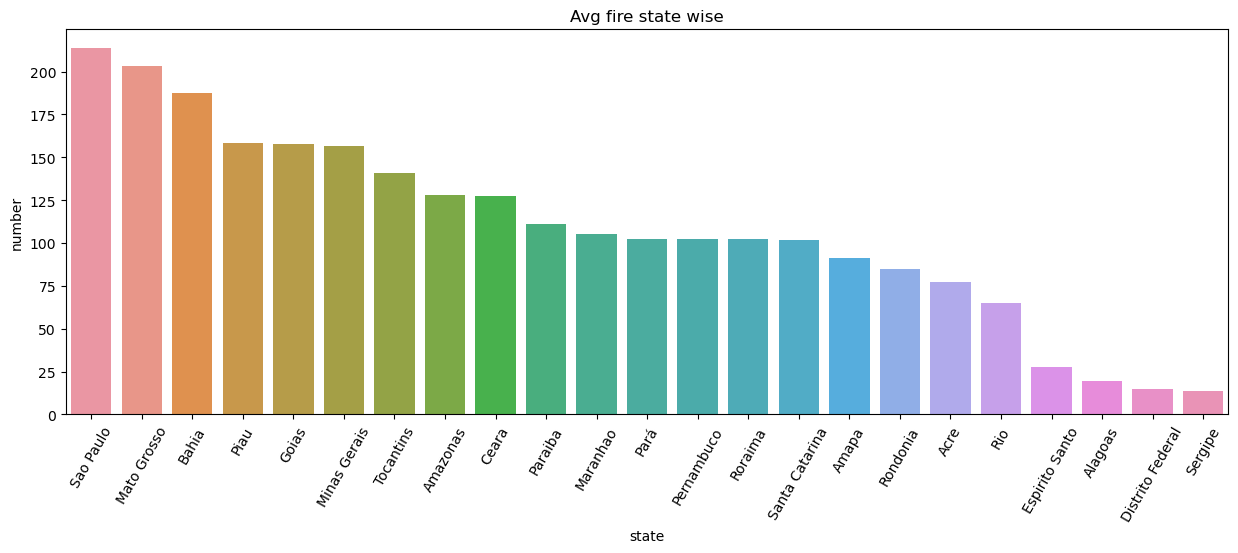

In [246]:
plt.figure(figsize=(15,5))
plt.title("Avg fire state wise")

sns.barplot(x='state', y='number', data=fire)
plt.xticks(rotation = 60)
plt.show()

# Find the states names where fire reported in dec month

In [247]:
df.columns

Index(['year', 'state', 'month', 'number', 'date', 'Month_new'], dtype='object')

In [250]:
name8=df[df['Month_new']=='December']

In [251]:
name8

,year,state,month,number,date,Month_new
220,1998,Acre,Dezembro,7.0,1998-01-01,December
221,1999,Acre,Dezembro,0.0,1999-01-01,December
222,2000,Acre,Dezembro,0.0,2000-01-01,December
223,2001,Acre,Dezembro,0.0,2001-01-01,December
224,2002,Acre,Dezembro,1.0,2002-01-01,December
...,...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01,December
6450,2013,Tocantins,Dezembro,85.0,2013-01-01,December
6451,2014,Tocantins,Dezembro,223.0,2014-01-01,December
6452,2015,Tocantins,Dezembro,373.0,2015-01-01,December


In [260]:
name9=name8.groupby('state')['number'].unique()

In [261]:
name9

state
Acre                         [7.0, 0.0, 1.0, 2.0, 4.0, 3.0, 6.0, 8.0]
Alagoas             [32.0, 12.0, 2.0, 30.0, 95.0, 43.0, 71.0, 16.0...
Amapa               [84.0, 41.0, 30.0, 593.0, 200.0, 411.0, 777.0,...
Amazonas            [196.0, 2.0, 60.0, 22.0, 44.0, 147.0, 53.0, 17...
Bahia               [82.0, 37.0, 24.0, 158.0, 848.0, 710.0, 423.0,...
Ceara               [276.0, 397.0, 389.0, 545.0, 1.787, 2.436, 3.1...
Distrito Federal                                      [0.0, 1.0, 2.0]
Espirito Santo      [5.0, 0.0, 3.0, 1.0, 12.0, 18.0, 9.0, 14.0, 32...
Goias               [13.0, 20.0, 6.0, 18.0, 115.0, 129.0, 56.0, 5....
Maranhao            [1.399, 1.001, 1.461, 1.296, 2.165, 2.424, 3.2...
Mato Grosso         [76.0, 47.0, 98.0, 37.0, 1.157, 1.622, 1.217, ...
Minas Gerais        [21.0, 32.0, 14.0, 44.0, 225.0, 125.0, 65.0, 9...
Paraiba             [51.0, 40.0, 34.0, 70.0, 163.0, 288.0, 351.0, ...
Pará                [1.008, 766.0, 1.698, 2.564, 3.118, 4.787, 5.5...
Pernambuco    